https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
    
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

# House Prices Predictions

Los datos son cogidos del siguiente kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

Importo las librerías necesarias

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

Cargamos los datos de train y test y echamos un primer vistazo a los datos

In [309]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [310]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [311]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

En un primer vistazo vemos que tenemos 1460 registros y 81 columnas.

De las 81 columnas vemos que alguna de ellas tienen datos nulos como Alley, FireplaceQu, PoolQc, Fence y MiscFeature

In [312]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Vamos a analizar la variable que queremos predecir, SalePrice

In [313]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Hay gran diferencia entre el mínimo y el máximo, y la mediana está más próxima al mínimo que al máximo.

Vamos a graficarlo en un histograma

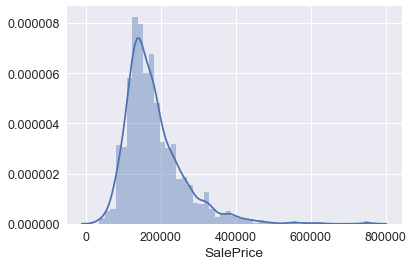

In [314]:
sns.distplot(df_train["SalePrice"]);

Voy a echar un vistazo a la correlación entre las variables del Data Frame

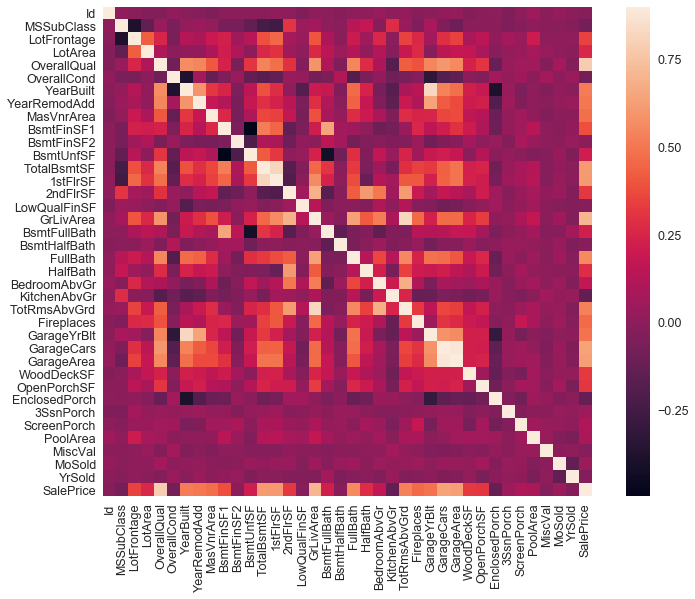

In [315]:
corrmat = df_train.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.9, square = True);

Vemos que hay unas variables que tienen fuerte relación con SalePrice:
* OverallQual: Overall material and finish quality
* GrLivArea: Above grade (ground) living area square feet
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet

Vamos a hacer el mismo mapa de correlación pero con las 10 variables más relacionadas con SalePrice

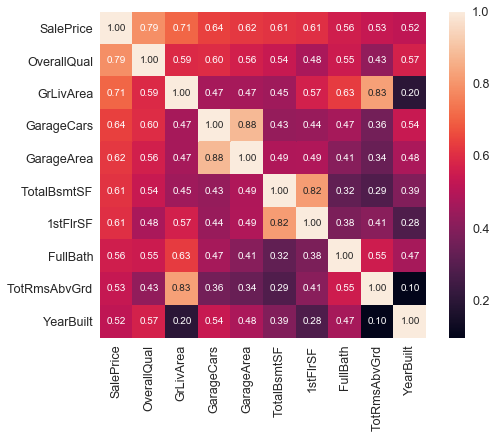

In [316]:
plt.subplots(figsize = (8, 6))

columns = corrmat.nlargest(10, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[columns].values.T)
sns.set(font_scale = 1.25)

hm = sns.heatmap(cm, square = True, cbar = True, annot = True, fmt='.2f', annot_kws = {'size': 10}, 
                 yticklabels = columns.values, xticklabels = columns.values)
plt.show()

También vemos relación entre algunas variables, lo que puede ocasionar multicolinealidad:
* TotalBsmtSF con 1stFlrSF
* GarageCars con GarageArea
* YearBuilt con GarageYrBlt
* GrLivArea con TotRmsAbvGrd

Por tanto, voy a graficar la relación entre SalePrice con OverallQual, GrLivArea y TotalBsmtSf

Aunque haya también cierta relación entre GarageArea con OverallQual voy a graficar GarageArea y voy a hacer lo mismo con FullBath y YearBuilt

In [317]:
df_train["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Es una variable categórica, voy a realizar un boxplot

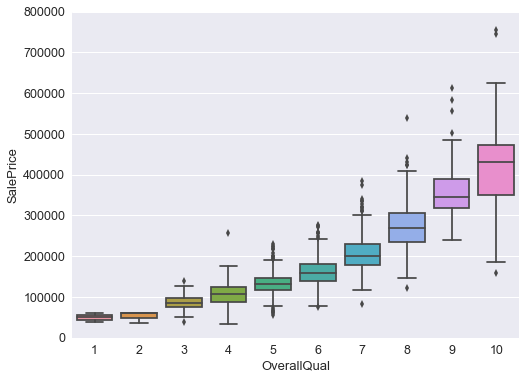

In [318]:
plt.subplots(figsize = (8, 6))

fig = sns.boxplot(x = df_train["OverallQual"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("OverallQual", fontsize = 13)
fig.axis(ymin = 0, ymax = 800000)

plt.show()

Vemos que hay una relación bastante directa, a mayor calidad de los materiales mayor es el precio.

Vamos a evaluar SalePrice con GrLivArea

In [319]:
df_train["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

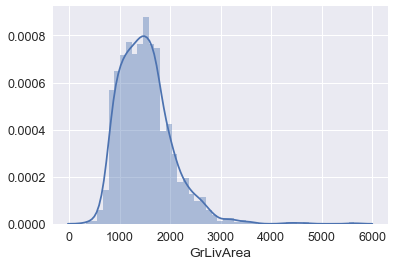

In [320]:
sns.distplot(df_train["GrLivArea"]);

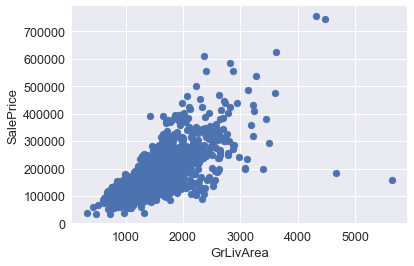

In [321]:
fig = plt.scatter(x = df_train["GrLivArea"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("GrLivArea", fontsize = 13)

plt.show()

También, vemos que hay relación muy directa. Y también que hay casos muy extremos que podríamos considerarlos como outliers. Vemos en concreto, dos casas muy grandes pero cuyo precio no sigue el mismo patrón.

Veamos la relación con TotalBsmtSf

In [322]:
df_train["TotalBsmtSF"].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

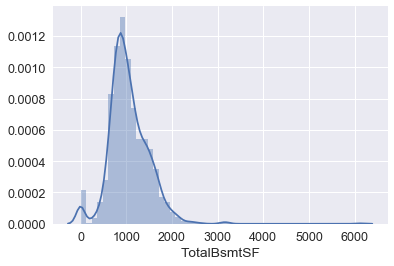

In [323]:
sns.distplot(df_train["TotalBsmtSF"]);

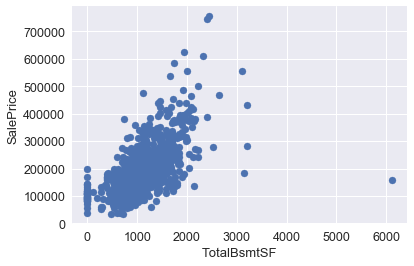

In [324]:
fig = plt.scatter(x = df_train["TotalBsmtSF"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("TotalBsmtSF", fontsize = 13)

plt.show()

También vemos que la relación es directa y hay un caso bastante extremo

Veamos con GarageArea

In [325]:
df_train["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

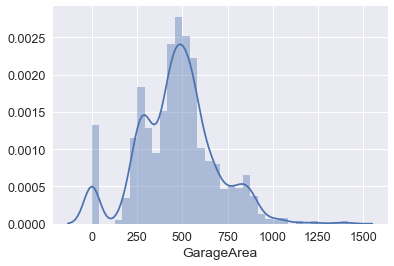

In [326]:
sns.distplot(df_train["GarageArea"]);

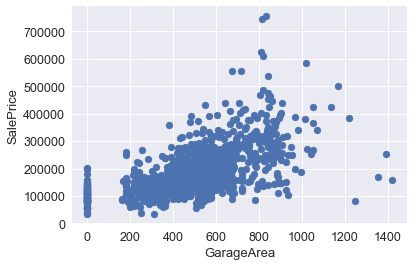

In [327]:
fig = plt.scatter(x = df_train["GarageArea"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("GarageArea", fontsize = 13)

plt.show()

Lo mismo, vemos cierta tendencia a que a mayor área de garage mayor es el precio.

Veamos ahora la relación con FullBath

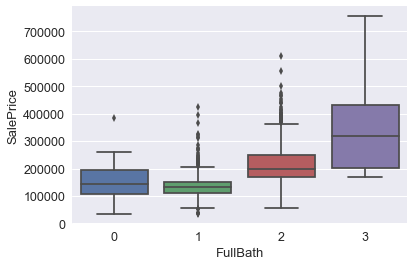

In [328]:
fig = sns.boxplot(x = df_train["FullBath"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("FullBath", fontsize = 13)

plt.show()

Bueno, se aprecia que cuantos más baños mayor es el precio, aunque parece que hay muchos valores atípicos cuando la casa tiene 1 o 2 baños...

Veamos si hay relación con YearBuilt

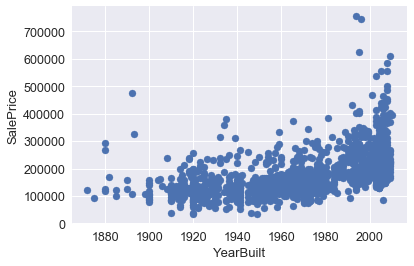

In [329]:
fig = plt.scatter(x = df_train["YearBuilt"], y = df_train["SalePrice"])

plt.ylabel("SalePrice", fontsize = 13)
plt.xlabel("YearBuilt", fontsize = 13)

plt.show()

Se aprecia cierta relación en cuanto a que en los últimos años parece que tanto los precios bajos como los altos han subido.

Prácticamente, la mayoría de las casas con más de 300.000 de valor han sido construidas a partir de 1980-1990.

Da la sensación de cierta exponencialidad, con una bajada inicial en los años 40 y luego subida exponencial

### Normalizar variables

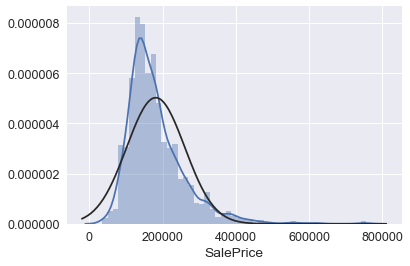

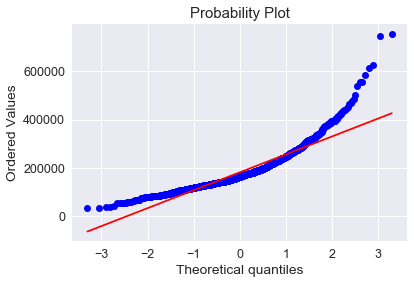

In [330]:
sns.distplot(df_train["SalePrice"], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot = plt)

In [331]:
df_train["SalePrice"] = np.log(df_train["SalePrice"])

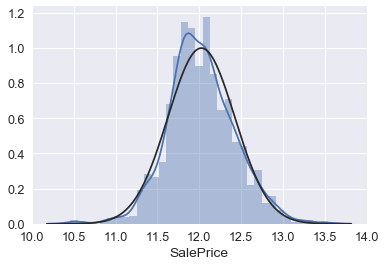

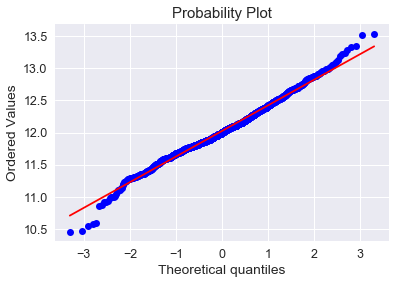

In [332]:
sns.distplot(df_train["SalePrice"], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot = plt)

### Outliers
Ya hemos visto ciertas relaciones entre algunas variables con SalePrice y vemos que hay tres casos en concreto que podríamos considerar como Outliers:
* Dos casos en los GrLivArea está por encima de 4000 y SalePrice por debajo de 300000
* Un caso en el TotalBsmtSF está por encima de 6000 y SalePrice por debajo de 300000

Directamente eliminamos estos registros

In [333]:
df_train[(df_train["GrLivArea"] > 4000) & (df_train["SalePrice"] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126759
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534473
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521139
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982929


In [334]:
df_train[(df_train["TotalBsmtSF"] > 6000) & (df_train["SalePrice"] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982929


In [335]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

### Missing Values

Vamos a analizar los missing values, para ello voy a juntar los dos data sets y quito la variable SalePrice del train, que será la variable y de entrenamiento de nuestro modelo.

In [336]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
df_all_data = pd.concat((df_train, df_test)).reset_index(drop = True)
df_all_data.drop(["SalePrice"], axis = 1, inplace = True)
print("all_data size is : {}".format(df_all_data.shape))

all_data size is : (2917, 80)


In [337]:
df_all_data.isnull().sum().sort_values(ascending = False)[:35] / len(df_all_data) * 100

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtCond         2.811107
BsmtExposure     2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
Exterior2nd      0.034282
KitchenQual      0.034282
Exterior1st      0.034282
GarageCars       0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
SaleType         0.034282
Condition2       0.000000
dtype: float64

#### Columnas que elimino
PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage, GarageQual, GarageFinish, GarageYrBlt, GarageCond, GarageType, BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2, BsmtFinType1, Utilities

In [338]:
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage", "GarageQual", "GarageFinish", "GarageYrBlt", 
        "GarageCond", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "Utilities"]

for col in cols:
    df_all_data.drop(col, axis = 1, inplace = True)

#### Columnas que sustituyo sus NaN por cero
MasVnrArea, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1

In [339]:
cols = ["MasVnrArea", "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea", "TotalBsmtSF", "BsmtUnfSF",
        "BsmtFinSF2", "BsmtFinSF1"]

for col in cols:
    df_all_data[col] = df_all_data[col].fillna(0)

#### Columnas que sustituyo NaN por None
MasVnrType

In [340]:
df_all_data["MasVnrType"] = df_all_data["MasVnrType"].fillna("None")

#### Columnas que sustituyo NaN por su valor más frecuente
MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Functional

In [341]:
cols = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType", "Functional"]

for col in cols:
    df_all_data[col] = df_all_data[col].fillna(df_all_data[col].mode()[0])

Vamos a comprobar si hay NaN

In [342]:
df_all_data.isnull().sum().max()

0

### Variables numéricas que en realidad son categóricas

In [343]:
#MSSubClass = The building class
df_all_data['MSSubClass'] = df_all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_all_data['OverallCond'] = df_all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_all_data['YrSold'] = df_all_data['YrSold'].astype(str)
df_all_data['MoSold'] = df_all_data['MoSold'].astype(str)

### Label encoding para algunas variables categóricas

In [344]:
from sklearn.preprocessing import LabelEncoder

cols = ('ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'Functional', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 
        'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_all_data[c].values)) 
    df_all_data[c] = lbl.transform(list(df_all_data[c].values))

# shape        
print('Shape all_data: {}'.format(df_all_data.shape))

Shape all_data: (2917, 63)


### Añado una variable nueva

In [345]:
df_all_data['TotalSF'] = df_all_data['TotalBsmtSF'] + df_all_data['1stFlrSF'] + df_all_data['2ndFlrSF']

### Oblicuidad de variables numéricas

In [346]:
numeric_feats = df_all_data.dtypes[df_all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


Box Cox Transformation of (highly) skewed features

In [347]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_all_data[feat] = boxcox1p(df_all_data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


### Variables categóricas a dummies

In [348]:
df_all_data = pd.get_dummies(df_all_data)

In [349]:
df_all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,1.540963,11.170327,0.0,0.730463,0.000000,7.483296,0.730463,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,1.540963,12.062832,0.0,0.000000,0.730463,8.897844,0.730463,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,1.540963,10.200343,0.0,0.730463,0.000000,9.917060,0.730463,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,1.540963,8.274266,0.0,0.730463,0.000000,10.468500,0.730463,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,1.820334,10.971129,0.0,0.730463,0.000000,10.221051,0.730463,...,0,0,0,0,0,0,0,0,0,1


Datos finales

In [350]:
train = df_all_data[:ntrain]
test = df_all_data[ntrain:]

### Modelos

Datos de entrada al modelo

In [351]:
X = train.values
y = y_train

Modelos que voy a usar

In [352]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

Para mirar el error de nuestro modelo

In [353]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [354]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

#### K-Vecinos

In [355]:
kreg = GridSearchCV(estimator = KNeighborsRegressor(n_neighbors = 1), 
                    param_grid = {"n_neighbors" : np.arange(1, 50)},)

kreg.fit(X, y)
kreg.best_params_

{'n_neighbors': 7}

#### Linear Regression

In [356]:
Lreg = LinearRegression()
Lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Decision Tree Regressor

In [357]:
Treg = GridSearchCV(estimator = DecisionTreeRegressor(min_samples_leaf = 10),
                    param_grid = {"min_samples_leaf" : np.arange(5, 50)})
Treg.fit(X, y)
Treg.best_params_

{'min_samples_leaf': 7}

#### Random Forest

In [92]:
RFreg = GridSearchCV(estimator = RandomForestRegressor(n_estimators = 100),
                     param_grid = {"max_depth" : np.arange(5, 50)})
RFreg.fit(X, y)
RFreg.best_params_

{'max_depth': 38}

#### XGboost

In [358]:
xgreg = XGBRegressor(max_depth = 3, n_estimators = 1500)
xgreg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Resultados

#### Solo Variables numéricas

KVecinos

In [44]:
print(np.sqrt(-cross_val_score(kreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, kreg.predict(X_test)))

47535.5352872
15.3983909426


Linear Regression

In [45]:
print(np.sqrt(-cross_val_score(Lreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Lreg.predict(X_test)))

36558.3728977
12.7750372824


Decision Tree Regressor

In [46]:
print(np.sqrt(-cross_val_score(Treg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Treg.predict(X_test)))

37564.408194
9.83774810518


Random Forest

In [47]:
print(np.sqrt(-cross_val_score(RFreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, RFreg.predict(X_test)))

30084.8796067
3.75584913919


Xgboost

In [49]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

26531.9136227
1.48282800811


#### Quitamos Outliers

KVecinos

In [94]:
print(np.sqrt(-cross_val_score(kreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, kreg.predict(X_test)))

47112.2886021
15.4909599544


Linear Regression

In [95]:
print(np.sqrt(-cross_val_score(Lreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Lreg.predict(X_test)))

30465.6196423
12.3767537436


Decision Tree Regressor

In [96]:
print(np.sqrt(-cross_val_score(Treg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Treg.predict(X_test)))

34998.5289256
10.4255542256


Random Forest

In [98]:
print(np.sqrt(-cross_val_score(RFreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, RFreg.predict(X_test)))

26767.7376714
3.74785072727


Xgboost

In [97]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

24215.3902028
1.44574095411


#### Variables categóricas a Dummies y se cogen todas

KVecinos

In [145]:
print(np.sqrt(-cross_val_score(kreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, kreg.predict(X_test)))

47112.2886021
15.4909599544


Linear Regression

In [146]:
print(np.sqrt(-cross_val_score(Lreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Lreg.predict(X_test)))

6012433678.95
8.4480904077


Decision Tree Regressor

In [147]:
print(np.sqrt(-cross_val_score(Treg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Treg.predict(X_test)))

35648.731175
6.64328306929


Random Forest

Xgboost

In [97]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

24215.3902028
1.44574095411


#### Variables numéricas que en realidad son categóricas

KVecinos

In [192]:
print(np.sqrt(-cross_val_score(kreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, kreg.predict(X_test)))

47181.2695443
15.5612599815


Linear Regression

In [193]:
print(np.sqrt(-cross_val_score(Lreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Lreg.predict(X_test)))

19313542706.4
8.40737529624


Decision Tree Regressor

In [194]:
print(np.sqrt(-cross_val_score(Treg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Treg.predict(X_test)))

35202.4705662
7.33848826119


Random Forest

Xgboost

In [195]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

23463.398379
1.36582119799


A partir de ahora solo me quedo con el Xgboost

#### Label encoding para variables categóricas

Xgboost

In [238]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

23087.5111584
1.29742812096


#### Añadir nueva variable que sume todos los metros cuadrados

In [257]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

22925.7013578
1.2602767112


#### Oblicuidad de variables numéricas

In [307]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))

22931.3998437
1.2602767112


#### Normalizar la variable objetivo

En este caso voy a evaluar todos los modelos menos el Random Forest. Como hemos normalizado la variable objetivo, para calcular el error tengo que transformarlo nuevamente

Kvecinos

In [360]:
print(np.sqrt(-cross_val_score(kreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, kreg.predict(X_test)))
print(np.sqrt(mean_squared_error(np.exp(y), np.exp(kreg.predict(X)))))

0.239267769987
1.23919927845
42985.8887627


Linear Regression

In [364]:
print(np.sqrt(-cross_val_score(Lreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Lreg.predict(X_test)))
print(np.sqrt(mean_squared_error(np.exp(y), np.exp(Lreg.predict(X)))))

397402100.705
0.54807623034
18658.2835201


Decision Tree Regresor

In [365]:
print(np.sqrt(-cross_val_score(Treg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, Treg.predict(X_test)))
print(np.sqrt(mean_squared_error(np.exp(y), np.exp(Treg.predict(X)))))

0.178907357077
0.609535906392
20127.065028


xgboost

In [367]:
print(np.sqrt(-cross_val_score(xgreg, X, y, scoring = "neg_mean_squared_error", cv = 10).mean()))
print(mean_absolute_percentage_error(y_test, xgreg.predict(X_test)))
print(np.sqrt(mean_squared_error(np.exp(y), np.exp(xgreg.predict(X)))))

0.117385003479
0.104009994103
2893.38039572
